### Tercer y Cuarto Ejercicio -- se pasa para otra clase


Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [79]:
import os
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from matplotlib import pyplot as plt

HAR

In [80]:
PATH_DATASET = "Data/Hard_data/train"

In [81]:
X_train = np.loadtxt(os.path.join(PATH_DATASET, "X_train.txt"))
y_train = np.loadtxt(os.path.join(PATH_DATASET, "y_train.txt")).astype(int)
print("Estructura features del dataset: {}".format(X_train.shape))
print("Estructura de las etiquetas: {}".format(y_train.shape))

Estructura features del dataset: (7352, 561)
Estructura de las etiquetas: (7352,)


In [82]:
# Exploramos un poco las features
df = pd.DataFrame(data=X_train)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


In [83]:
# Normalizar los datos
X_norm = StandardScaler()
X_norm= X_norm.fit_transform(X_train)
# Aplicar PCA y graficamos
pca = PCA(n_components=64).fit(X_norm)
X_pca = pca.transform(X_norm)

print(X_pca.shape)

(7352, 64)


1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

2. Gráficar la variación acumulada para cada caso.


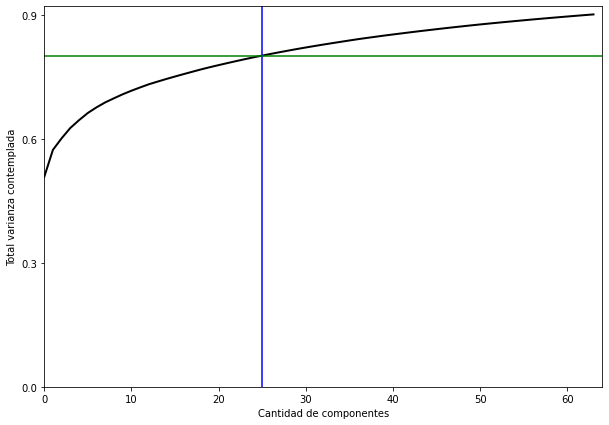

In [84]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 64)
plt.yticks(np.arange(0, 1, 0.3))
plt.axvline(25, c='b')
plt.axhline(0.8, c='g')
plt.show();

In [85]:
# Determinar el número de componentes necesarias para explicar el 80% de la varianza
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio > 0.8) 
# Visualizar el número de componentes y la varianza explicada
print("Número de componentes necesarias para explicar el 80% de la varianza:", n_components)
print("Varianza explicada por las primeras", n_components, "componentes:", cumulative_variance_ratio[n_components - 1])


Número de componentes necesarias para explicar el 80% de la varianza: 25
Varianza explicada por las primeras 25 componentes: 0.7975941410588069


3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.


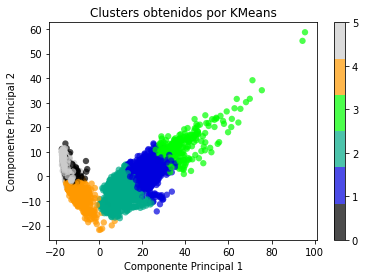

In [86]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Aplicar KMeans con 6 clusters
kmeans = KMeans(n_clusters=6,n_init=100, random_state=17)
kmeans.fit(X_pca)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Graficar los clusters en 2D utilizando las dos primeras componentes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters obtenidos por KMeans')
plt.colorbar()

plt.show()

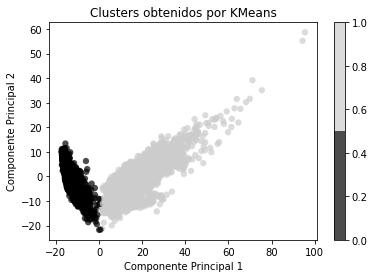

In [87]:

# Aplicar KMeans con 2 clusters
kmeans = KMeans(n_clusters=2,n_init=100, random_state=17)
kmeans.fit(X_pca)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Graficar los clusters en 2D utilizando las dos primeras componentes principales
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters obtenidos por KMeans')
plt.colorbar()

plt.show()

En este caso agrupo k=2 es mas facil ver la agrupación de datos se puede ver la devision de dos clases. En cambio usar K=6 se ve más complejo realizar la división con las agrupaciones 

5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

PCA puede ayudar a reducir la dimensionalidad de los datos, lo que puede beneficiar al utilizar Kmeans, ya que este tipo de algoritmo puede tener dificultades al manejar grandes cantidades de caracteristiica. Es por eso que al reducir la dimensionalidad de los datos, se puede mejorar el rendimiento y la eficiencia de Kmeans. Tambien otras cuestiones favorables que al reducir la dimensionalidad puede ayudar a reducir el ruido , la redundancia en los datos, la mejora de interpretación de los resultados y la identificación de patrones y relaciones complejas de los datos.